In [2]:
!pip install numpy pandas matplotlib

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 359.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------------------- ------------ 112.6/165.5 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB 5.4 MB/s eta 0:00:03
   - -------------------------------------- 0.6/16.2 MB 6.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/16.2 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/16.2 MB 6.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.2 MB 5.9 MB/s eta 0:00:03
   -- -


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------ --------------------------------- 51.2/294.9 kB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 71.7/294.9 kB 1.3 MB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 845.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 833.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 833.5 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 801.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 842.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 827.5 kB/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [8]:
df = pd.read_csv(r"C:\Users\lenovossd\Downloads\archive\Test Dataset.csv")


In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

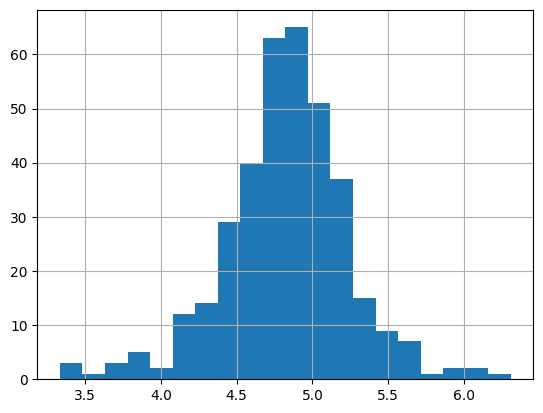

In [13]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
loanAmount_log        5
dtype: int64

<Axes: >

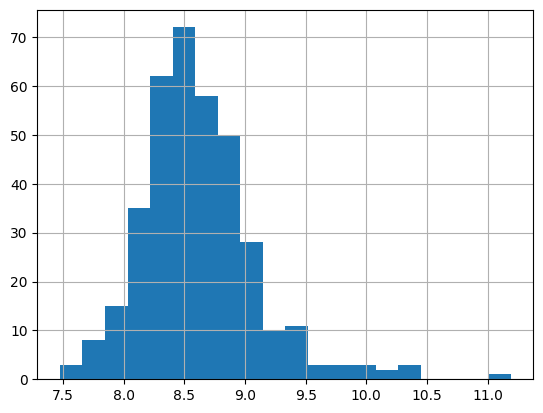

In [15]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [20]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# Fill missing LoanAmount
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Create 'LoanAmount_log' column if it doesn't exist and fill missing values
if 'LoanAmount_log' not in df.columns:
    df['LoanAmount_log'] = np.log1p(df['LoanAmount'])  # Assuming log transformation of LoanAmount

# Fill missing values in 'LoanAmount_log'
df['loanAmount_log'] = df['loanAmount_log'].fillna(df['LoanAmount_log'].mean())

# Fill missing values for 'Loan_Amount_Term' and 'Credit_History'
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [22]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:12].values

In [23]:
x

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 1.0, 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [24]:
y

array([['LP001015', 'Male', 'Yes', '0', 'Graduate', 'No', 5720, 0, 110.0,
        360.0, 1.0, 'Urban', 4.700480365792417, 5720, 8.651724084373843,
        4.709530201312334],
       ['LP001022', 'Male', 'Yes', '1', 'Graduate', 'No', 3076, 1500,
        126.0, 360.0, 1.0, 'Urban', 4.836281906951478, 4576,
        8.428580533059634, 4.844187086458591],
       ['LP001031', 'Male', 'Yes', '2', 'Graduate', 'No', 5000, 1800,
        208.0, 360.0, 1.0, 'Urban', 5.337538079701318, 6800,
        8.824677891164198, 5.342334251964811],
       ['LP001035', 'Male', 'Yes', '2', 'Graduate', 'No', 2340, 2546,
        100.0, 360.0, 1.0, 'Urban', 4.605170185988092, 4886,
        8.494129251817686, 4.61512051684126],
       ['LP001051', 'Male', 'No', '0', 'Not Graduate', 'No', 3276, 0,
        78.0, 360.0, 1.0, 'Urban', 4.356708826689592, 3276,
        8.09437844497296, 4.3694478524670215],
       ['LP001054', 'Male', 'Yes', '0', 'Not Graduate', 'Yes', 2165,
        3422, 152.0, 360.0, 1.0, 'Urban', 5.02

In [26]:
print("Percentage of missing Gender is %2f%%" % ((df['Gender'].isnull().sum() / df.shape[0]) * 100))


Percentage of missing Gender is 0.000000%


number of people who take loan as group by gender:
Gender
Male      297
Female     70
Name: count, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\1107357606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

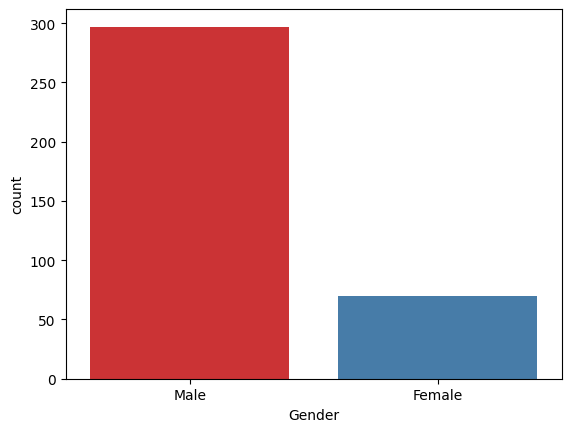

In [27]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of people who take loan as group by marital status:
Married
Yes    233
No     134
Name: count, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\3637791506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

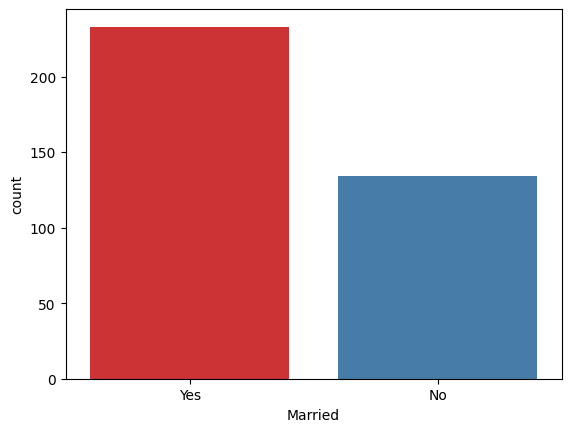

In [28]:
print("number of people who take loan as group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as group by dependents:
Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\348447637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

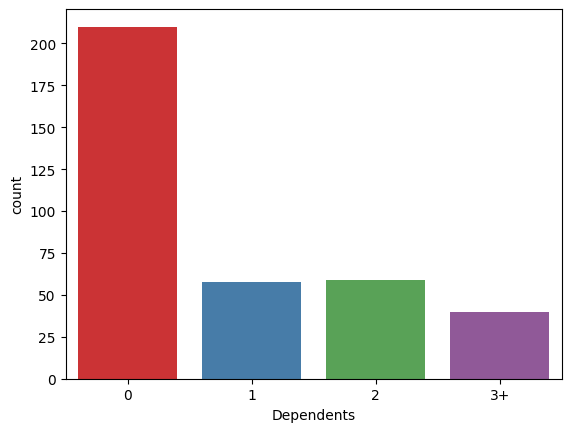

In [29]:
print("number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of people who take loan as group by self employed:
Self_Employed
No     330
Yes     37
Name: count, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\2369383784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=df,palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

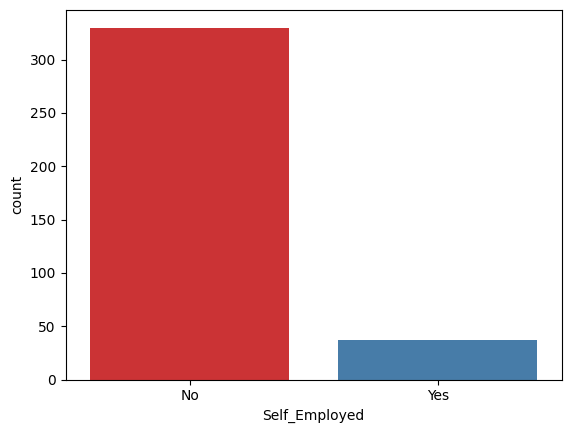

In [30]:
 print("number of people who take loan as group by self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of people who take loan as group by Loanamount:
LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
197.0     1
85.0      1
60.0      1
76.0      1
98.0      1
Name: count, Length: 145, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\4119183960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=df,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

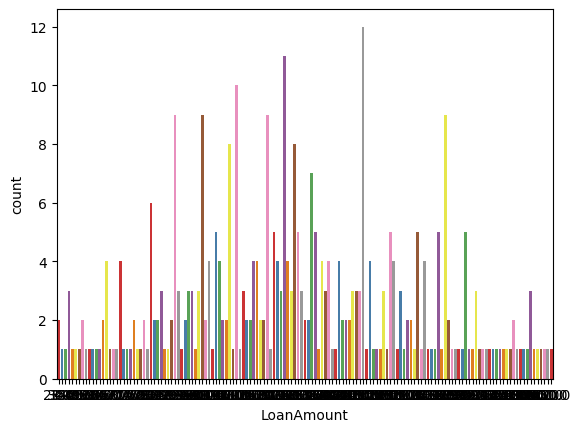

In [31]:
print("number of people who take loan as group by Loanamount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of people who take loan as group by Credit history:
Credit_History
1.0    308
0.0     59
Name: count, dtype: int64


C:\Users\lenovossd\AppData\Local\Temp\ipykernel_10248\3082041942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History',data=df,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

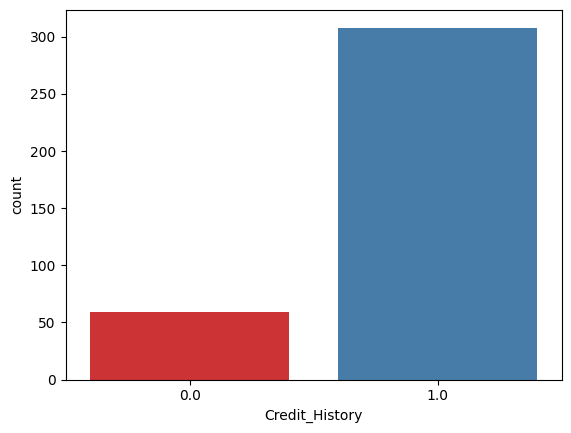

In [32]:
print("number of people who take loan as group by Credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [34]:
print(f"Length of x: {len(x)}")
print(f"Length of y: {len(y)}")


Length of x: 367
Length of y: 12


In [36]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'loanAmount_log',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder

# Assuming the target column is 'Loan_Status'
target_column_name = 'Loan_Status'  # Replace this with the actual target column name if different

# Check if the target column exists
if target_column_name not in df.columns:
    print(f"Target column '{target_column_name}' not found in DataFrame columns.")
else:
    # Encode the target column
    encode = LabelEncoder()
    df[target_column_name] = encode.fit_transform(df[target_column_name])

    # Define features (X) and target (y)
    x = df.drop(columns=[target_column_name])  # Features
    y = df[target_column_name]  # Target

    print(f"Length of x: {len(x)}")
    print(f"Length of y: {len(y)}")

    # Now split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Output shapes
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")


Target column 'Loan_Status' not found in DataFrame columns.


In [39]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

NameError: name 'data' is not defined

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the DataFrame
data = pd.read_csv('C:\Users\lenovossd\Downloads\archive\Training Dataset.csv')

# Initialize the LabelEncoder
encode = LabelEncoder()

# Encode the Loan_Status column
data['Loan_Status'] = encode.fit_transform(data['Loan_Status'])


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4182778969.py, line 5)

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the DataFrame
data = pd.read_csv(r'C:\Users\lenovossd\Downloads\archive\Training Dataset.csv')

# Initialize the LabelEncoder
encode = LabelEncoder()

# Encode the Loan_Status column
data['Loan_Status'] = encode.fit_transform(data['Loan_Status'])


In [42]:
enc = OrdinalEncoder() 
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']] = enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']])
data.head()

NameError: name 'OrdinalEncoder' is not defined

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Load the DataFrame
data = pd.read_csv(r'C:\Users\lenovossd\Downloads\archive\Training Dataset.csv')

# Initialize the OrdinalEncoder
enc = OrdinalEncoder()

# Encode categorical columns
data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status", "Dependents"]] = enc.fit_transform(data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status", "Dependents"]])

# Display the head of the DataFrame
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


In [44]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [46]:
print(x_train.shape)

(429, 11)


In [47]:
print(x_test.shape)

(185, 11)


In [48]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

NameError: name 'StandardScaler' is not defined

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [50]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

NameError: name 'LogisticRegression' is not defined

In [51]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predict = LR.predict(x_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
from sklearn.impute import SimpleImputer

# Assuming x_train is a DataFrame with NaN values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
x_train_imputed = imputer.fit_transform(x_train)

# Now fit your LogisticRegression model with the imputed data
LR = LogisticRegression()
LR.fit(x_train_imputed, y_train)


LogisticRegression()

In [53]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
# Drop rows with NaN values (axis=0) or columns with NaN values (axis=1)
x_train_clean = x_train.dropna(axis=0)  # Adjust axis as per your data structure and needs

# Now fit your LogisticRegression model with the cleaned data
LR = LogisticRegression()
LR.fit(x_train_clean, y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [55]:
import pandas as pd

# Assuming x_train is a pandas DataFrame
nan_columns = x_train.columns[x_train.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [56]:
import numpy as np

# Check for NaN values in the entire array
nan_indices = np.isnan(x_train)
nan_columns = np.any(nan_indices, axis=0)

print("Columns with NaN values:")
print(nan_columns)


Columns with NaN values:
[ True  True  True False  True False False  True  True  True False]


In [57]:
x_train_clean = x_train[~np.isnan(x_train).any(axis=1)]


In [58]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].median())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

In [61]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [62]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [63]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

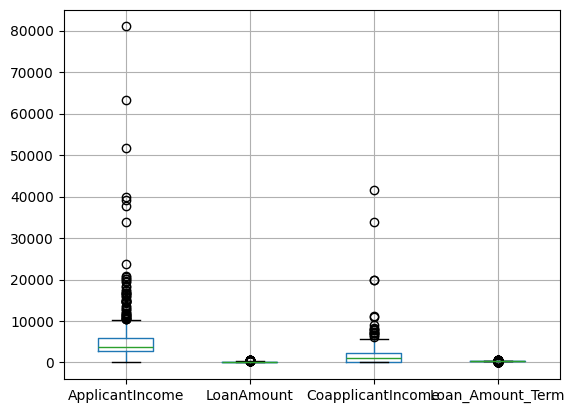

In [64]:
numeric_col = ['ApplicantIncome','LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
data.boxplot(numeric_col)

In [65]:
for x in ['ApplicantIncome', 'CoapplicantIncome']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [66]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].median())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

In [68]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
data.shape

(614, 13)

In [70]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [71]:
enc = OrdinalEncoder() 
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']] = enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [72]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [74]:
print(x_train.shape)

(429, 11)


In [75]:
print(x_test.shape)

(185, 11)


In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'classification_report' is not defined

In [77]:
from sklearn.metrics import classification_report, accuracy_score


In [78]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Logistic Regression accuracy is: 82.70%


C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Logistic Regression accuracy is: 82.70%


C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

NameError: name 'metrics' is not defined

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

NameError: name 'metrics' is not defined

In [83]:
from sklearn import metrics


Confusion Matrix for Logistic Regression :
 [[ 21  30]
 [  2 132]] 



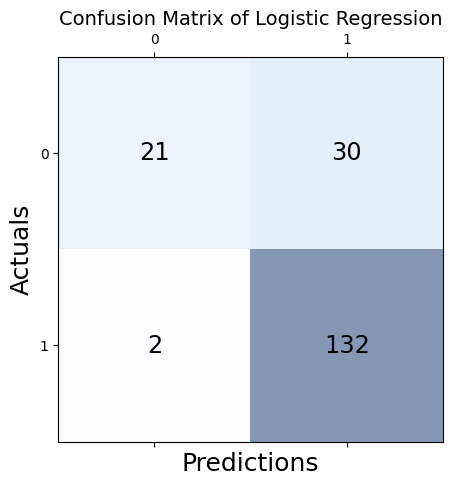

In [84]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

In [85]:
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train,y_train)
    predict_i = kNN.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Error Rate', fontsize=18)
plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In [86]:
from sklearn.neighbors import KNeighborsClassifier


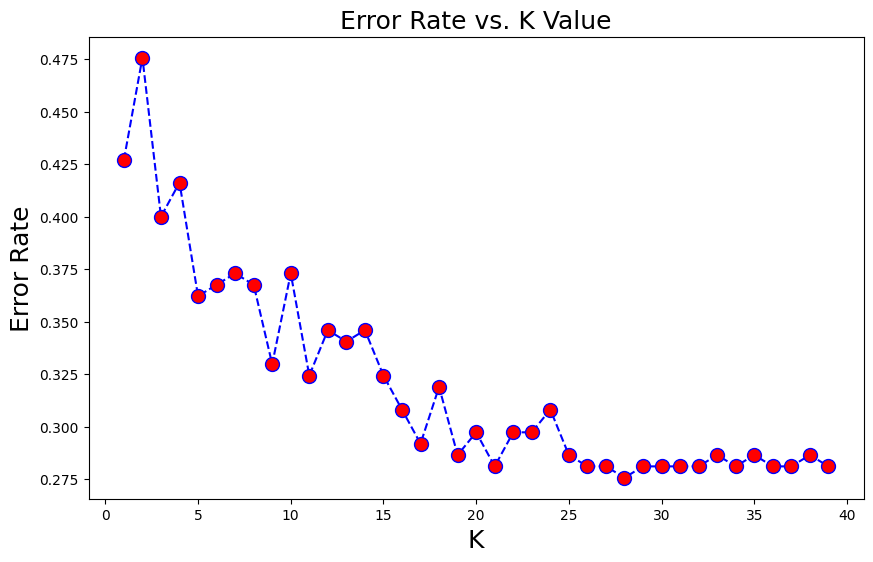

In [87]:
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train,y_train)
    predict_i = kNN.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Error Rate', fontsize=18)
plt.show()

In [88]:
KNN=KNeighborsClassifier(n_neighbors=13)
KNN.fit(x_train,y_train)
y_preds=model.predict(x_test)
print(classification_report(y_test, y_preds))
KNNAcc = accuracy_score(y_preds,y_test)
print('KNN model accuracy is: {:.2f}%'.format(KNNAcc*100))

NameError: name 'model' is not defined

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming x_train, y_train, x_test, y_test are defined and data is prepared
KNN = KNeighborsClassifier(n_neighbors=13)
KNN.fit(x_train, y_train)

y_preds = KNN.predict(x_test)
print(classification_report(y_test, y_preds))
KNNAcc = accuracy_score(y_preds, y_test)
print('KNN model accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

         0.0       0.23      0.10      0.14        51
         1.0       0.72      0.87      0.79       134

    accuracy                           0.66       185
   macro avg       0.47      0.49      0.46       185
weighted avg       0.58      0.66      0.61       185

KNN model accuracy is: 65.95%


Confusion Matrix for KNN :
 [[  5  46]
 [ 17 117]] 



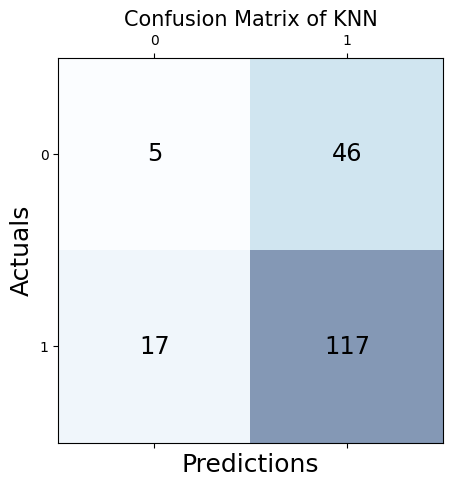

In [90]:
cm = metrics.confusion_matrix(y_test, y_preds)
print('Confusion Matrix for KNN :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN', fontsize=15)
plt.show()

In [91]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

NameError: name 'SVC' is not defined

In [92]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

SVC model accuracy is: 82.70%


In [93]:
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

SVC model accuracy is: 82.70%


Confusion Matrix for SVC :
 [[ 21  30]
 [  2 132]] 



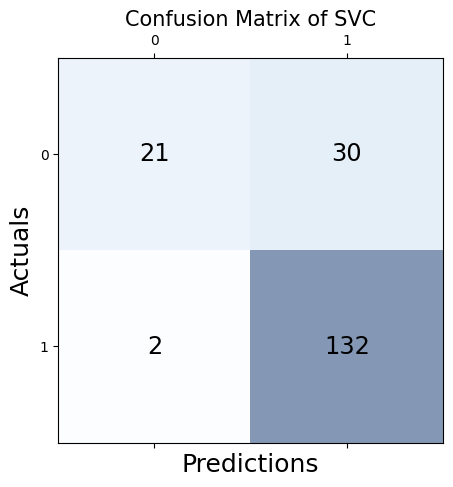

In [94]:
cm = metrics.confusion_matrix(y_test, predict_svc)
print('Confusion Matrix for SVC :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVC', fontsize=15)
plt.show()

In [95]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(x_train,y_train)
predict_ID3 = DT.predict(x_test)
print(classification_report(y_test, predict_ID3))
ID3Acc = accuracy_score(predict_svc,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3Acc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

ID3 model accuracy is: 82.70%


Confusion Matrix for ID3 :
 [[ 21  30]
 [  2 132]] 



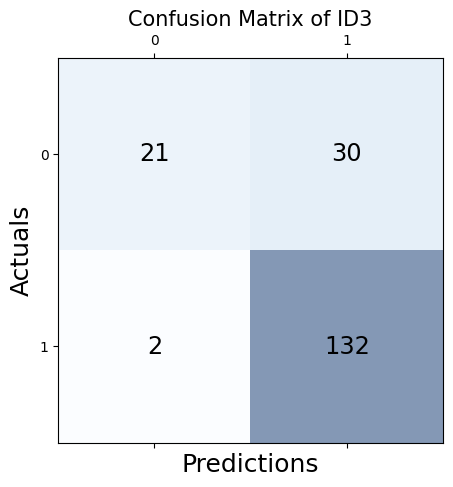

In [96]:
cm = metrics.confusion_matrix(y_test, predict_ID3)
print('Confusion Matrix for ID3 :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of ID3', fontsize=15)
plt.show()

In [97]:
from sklearn.tree import DecisionTreeRegressor
clf=RandomForestClassifier(n_estimators=800)
clf.fit(x_train,y_train)
y_pred_rf=clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
rfAcc = accuracy_score(y_pred_rf,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(rfAcc*100))

NameError: name 'RandomForestClassifier' is not defined

In [98]:
from sklearn.tree import RandomForestClassifier

ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\__init__.py)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf=RandomForestClassifier(n_estimators=800)
clf.fit(x_train,y_train)
y_pred_rf=clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
rfAcc = accuracy_score(y_pred_rf,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(rfAcc*100))

              precision    recall  f1-score   support

         0.0       0.71      0.43      0.54        51
         1.0       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.78      0.79      0.78       185

ID3 model accuracy is: 79.46%


Confusion Matrix for ID3 :
 [[ 22  29]
 [  9 125]] 



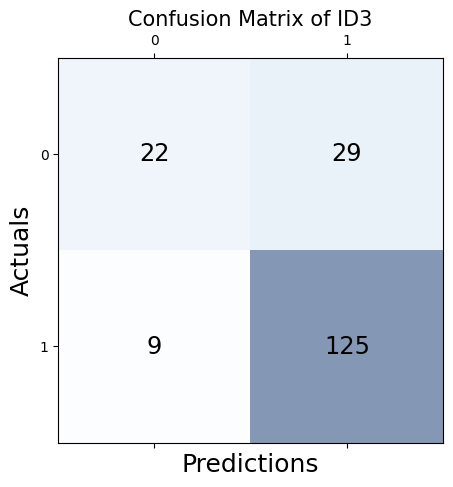

In [101]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix for ID3 :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of ID3', fontsize=15)
plt.show()

In [102]:
joblib_file = "loan_predition_model_RF"
joblib.dump(clf, joblib_file)
loaded_model = joblib.load(open(joblib_file, 'rb'))
pred_y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, pred_y), 2)
print(result)

NameError: name 'joblib' is not defined

In [103]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming x_train, y_train, and x_test are already defined
clf = RandomForestClassifier(n_estimators=800)
clf.fit(x_train, y_train)

# Saving the model to a file
joblib_file = "loan_prediction_model_RF.pkl"
joblib.dump(clf, joblib_file)

# Loading the model from the file
loaded_model = joblib.load(joblib_file)

# Making predictions with the loaded model
pred_y = loaded_model.predict(x_test)


In [104]:
joblib_file = "loan_predition_model_RF"
joblib.dump(clf, joblib_file)
loaded_model = joblib.load(open(joblib_file, 'rb'))
pred_y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, pred_y), 2)
print(result)

0.79


In [105]:
file = "loan_predition_model_LR.pkl"  
pickle.dump(LR, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))

pred_Y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, predict) ,2)
print(result)

NameError: name 'pickle' is not defined

In [106]:
from sklearn.linear_model import LogisticRegression
import pickle

In [107]:
file = "loan_predition_model_LR.pkl"  
pickle.dump(LR, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))

pred_Y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, predict) ,2)
print(result)

0.83
